<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [160]:
import numpy as np 
import matplotlib as plt 
import pandas as pd
import seaborn as sb
from matplotlib import *
from matplotlib import pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [210]:
df = pd.read_csv("/Users/samdisorbo/Downloads/mdst_tutorial/data/states_edu.csv")

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [211]:
df = df.dropna()

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Math/Reading for 4/8 grade>**   (Ex. Math for 8th grade)

**(Math for 4th Grade)**

Outcome Score in the questions refers to the outcome variable you chose here.



How many different years of data are in our dataset? Use a pandas function.

In [24]:
len(df.YEAR.value_counts())

#33 different years

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [213]:
mich = df[df.STATE == "MICHIGAN"]

mich_score = mich.AVG_MATH_4_SCORE.mean()

nohio = df[df.STATE == "OHIO"]

ohio_score = nohio.AVG_MATH_4_SCORE.mean()

print(mich_score > ohio_score)

#Ohio has a higher average outcome score across all years

False


Find the average for your outcome score across all states in 2019

In [214]:
twentnine = df[df.YEAR == 2019]

twentnine.AVG_MATH_4_SCORE.mean()

#avg in 2019 is 239.94

nan

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [215]:
states = df.groupby("STATE")
print(states.AVG_MATH_4_SCORE.max())

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              234.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    231.0
FLORIDA                 243.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             234.0
MISSOURI                241.0
MONTANA                 244.0
NEBRASKA                244.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_MEXICO              233.0
NEW_YORK                243.0
NORT

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [216]:
df['ieps'] = df['INSTRUCTION_EXPENDITURE']/df['GRADES_4_G']

df['srps'] = df['STATE_REVENUE']/df['GRADES_4_G']

df['lrps'] = df['LOCAL_REVENUE']/df['GRADES_4_G']

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,ieps,srps,lrps
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,49.144514,51.758997,28.982590
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,75.484429,80.412358,34.913890
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,36.885155,38.219967,37.748317
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,51.914089,70.276959,13.706839
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,59.912169,68.132842,41.349440


Final feature list: **<Instruction Expenditure per 4G student, local revenue per 4G student, state revenue per 4G student \>**

Feature selection justification: **<I wanted to see how much money is going into instruction per student, and how much money the state is getting per student--I believe wealth may be a good indicator of educational output\>**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

<AxesSubplot:xlabel='ieps', ylabel='AVG_MATH_4_SCORE'>

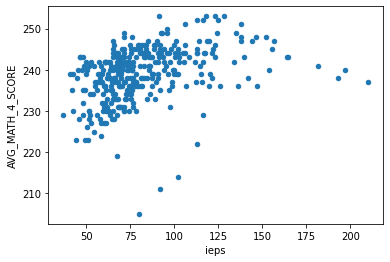

In [217]:
table = df[df.AVG_MATH_4_SCORE > 0]
table = table[table.ieps > 0]



table.plot.scatter(x = 'ieps', y = 'AVG_MATH_4_SCORE')

**<Graphing instruction expenditure vs. avg 4 grade math score>**

**Visualization 2**

<AxesSubplot:xlabel='sum', ylabel='AVG_MATH_4_SCORE'>

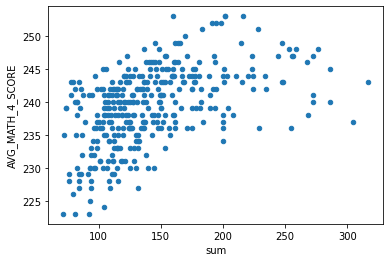

In [218]:
table = df[df.AVG_MATH_4_SCORE > 0]
table = table[table.lrps > 0]
table = table[table.srps > 0]

table['sum'] = table['lrps'] + table['srps']



table.plot.scatter(x = 'sum', y = 'AVG_MATH_4_SCORE')

**<sum of state and local revenue vs. the avg 4 grade math score>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
X = df[['lrps','srps', 'ieps']]
y = df['AVG_MATH_4_SCORE']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size= 0.3, random_state=0)

print(X_test)

            lrps        srps        ieps
567    94.886398   57.063066   85.562744
803   114.910827   66.186226   92.382141
1117   87.206442   61.430829   88.321527
985    55.650247   82.711048   79.751825
702    87.962034   65.078283   89.123650
...          ...         ...         ...
990   119.539486   82.143628  123.372166
1215   51.333377   57.024381   69.479767
766    49.468047  111.715180   98.440234
809    29.817534   44.200858   40.593010
905   114.103628   74.564990   96.842376

[107 rows x 3 columns]


<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [145]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [222]:
# create your model here
model = LinearRegression()

In [223]:
model.fit(X_train, y_train)

LinearRegression()

In [224]:
y_pred = model.predict(X_test)

In [139]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ValueError: plot_confusion_matrix only supports classifiers

<h2> Summary </h2>

/Users/samdisorbo/Downloads/mdst_tutorial/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, '4G Math Score')

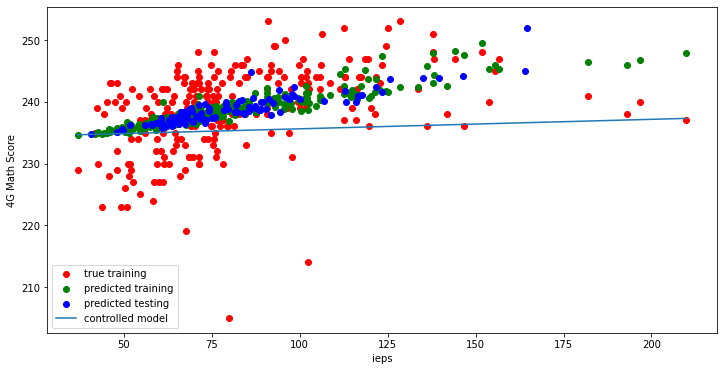

In [225]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'ieps'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['true training','predicted training','predicted testing','controlled model'])
plt.xlabel(col_name)
plt.ylabel('4G Math Score')

In [226]:
print(model.intercept_)
print(model.coef_)

230.32864955837232
[0.03244448 0.06632536 0.01534908]


In [227]:
# R**2 value describes how well a linear model fits the data
model.score(X_test, y_test)

0.08250763681081907

In [228]:
# mean error
np.mean(model.predict(X_test)-y_test)

-0.44274922758710816

In [229]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

4.8886189418485415

In [230]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

6.175415418730291

**<Our model tells us that for every 100 dollar increase in local revenue, state revenue, and instructional expidenture per 4G student, the average 4th grade math test score goes up 3, 6, and 2 points respectively. We are fairly confident in our model, as our mean absolute error lies at 5, meaning we are on average 5 points off on our predictions for test scores. >**